<a href="https://colab.research.google.com/github/indra07-rm/Data-warehousing-and-Data-mining/blob/main/lab_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
path ="/content/drive/MyDrive/data mining /hydropower-projects.csv"
df = pd.read_csv(path)
df.head(5)

,Project,Province,District,Municipality,Capacity (MW),River,Lic No,Isuue Date,Validity,Promoter,Address,Longitude,Latitude,License Type
0,Aayu Chhatigad Hydropower Project,Province 7,DARCHULA,Apihimal,13.942,Chatti Gad,798,12/21/2073,12/20/2075,Puwa Khola-1 Hydro Power Pvt.Ltd.,"Anamnagar-32,Kathmandu,Nepal. GPO 20863, 41027...",80.881528,29.820139,Survey
1,Aayu Malun Khola Hydro-Electric Project,Province 1,SOLUKHUMBU,Solududhakunda,21.000,Malun,807,1/15/2074,1/14/2076,Puwa Khola-1 Hydropower Private Limited,"Anamnagar-32, Kathmandu Nepal",86.425556,27.376944,Survey
2,Adhikhola Storage HEP,Province 5,PALPA,Bagnaskali,180.000,Adhikhola,821,2/4/2074,2/3/2076,Nepal Electricity Authority,"Nepal Electricity Authority, Central Office Du...",83.666667,27.950000,Survey
3,Akhu Khola-2 HPP,Province 4,GORKHA,Aarughat,20.000,Akhu Khola,749,7/29/2073,7/28/2075,Gorakshya Hydropower Pvt. Ltd.,"House no.319,Babarmahal, Kathmandu, 4219730,42...",84.962639,28.040139,Survey
4,Andhi Khola,Province 4,SYANGJA,Bhirkot,9.400,Andhi Khola,2_gtd,1/8/2052,12/30/2101,Butwal Power Company,0,83.680972,27.938333,Operation


In [3]:
# Step 2: Find the province with the most hydropower projects
province_counts = df['Province'].value_counts()
top_province = province_counts.idxmax()
print(f"Province with most hydropower projects: {top_province}")

Province with most hydropower projects: Province 4


In [6]:

# Step 3: Filter data for that province
top_df = df[df['Province'] == top_province]


In [8]:
# Step 4: Convert filtered DataFrame to GeoDataFrame
import geopandas as gpd
gdf_points = gpd.GeoDataFrame(
    top_df,
    geometry=gpd.points_from_xy(top_df['Longitude'], top_df['Latitude']),
    crs="EPSG:4326"
)

In [10]:
# Step 5: Load Nepal province shapefile
import os
os.environ['SHAPE_RESTORE_SHX'] = 'YES'
shapefile_path = "/content/drive/MyDrive/data mining /province.shp"  # update this path
gdf_provinces = gpd.read_file(shapefile_path)

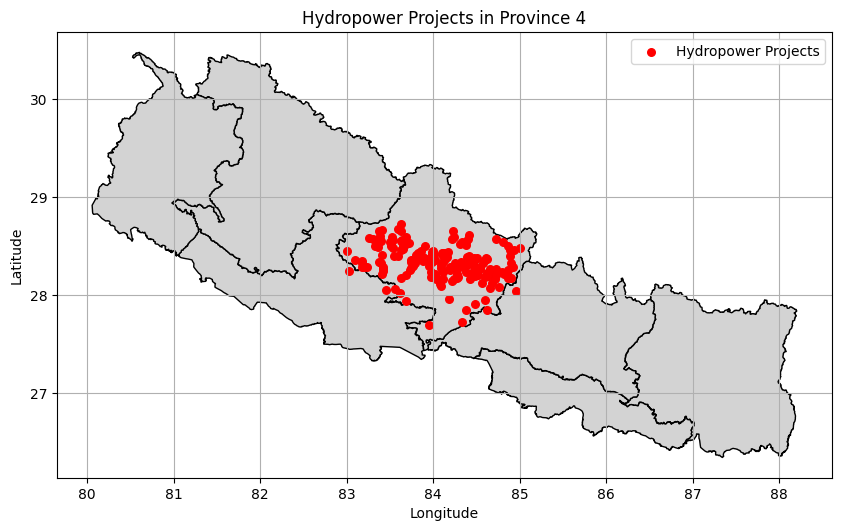

In [13]:
# Step 6: Plot map
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 8))
gdf_provinces.plot(ax=ax, color='lightgrey', edgecolor='black')
gdf_points.plot(ax=ax, color='red', markersize=30, label='Hydropower Projects')
plt.title(f"Hydropower Projects in {top_province}")
plt.legend()
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()

## Write a code to scrape the following urls
https://en.wikipedia.org/wiki/Markov_decision_process
https://en.wikipedia.org/wiki/Reinforcement_learning
https://en.wikipedia.org/wiki/Multi-agent_reinforcement_learning
https://en.wikipedia.org/wiki/Andrew_Barto
https://en.wikipedia.org/wiki/Richard_S._Sutton
https://pt.wikipedia.org/wiki/Aprendizagem_por_refor%C3%A7o


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


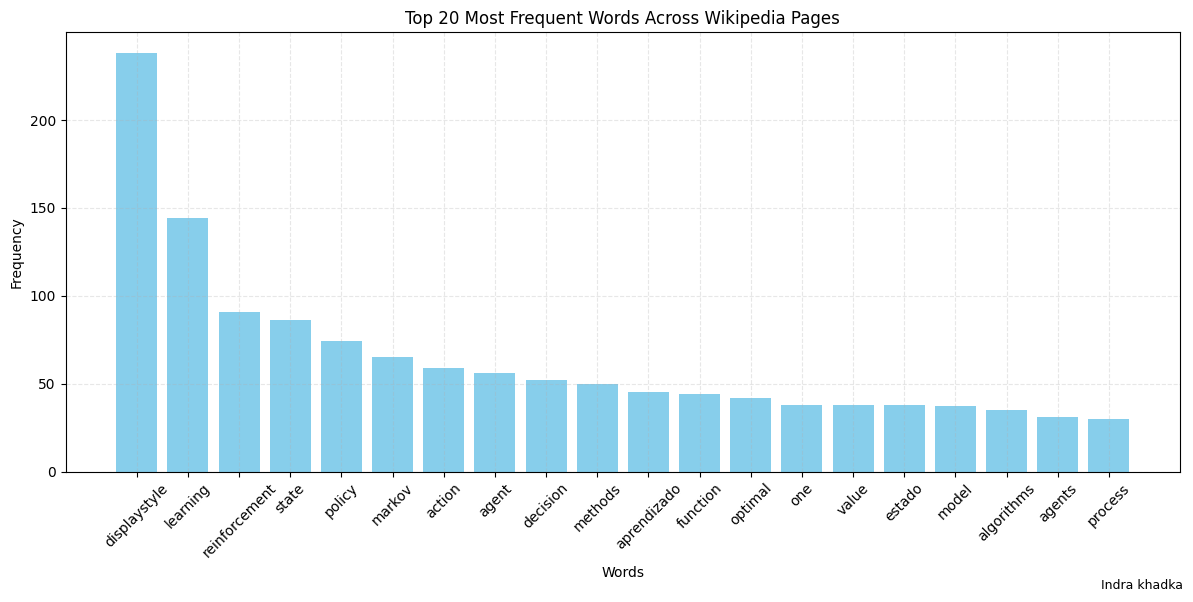

In [17]:
import requests
from bs4 import BeautifulSoup
from collections import Counter
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords

# Download stopwords (only once)
nltk.download('stopwords')

# URLs to scrape
urls = [
    "https://en.wikipedia.org/wiki/Markov_decision_process",
    "https://en.wikipedia.org/wiki/Reinforcement_learning",
    "https://en.wikipedia.org/wiki/Multi-agent_reinforcement_learning",
    "https://en.wikipedia.org/wiki/Andrew_Barto",
    "https://en.wikipedia.org/wiki/Richard_S._Sutton",
    "https://pt.wikipedia.org/wiki/Aprendizagem_por_refor%C3%A7o"
]

# Combined text content
all_text = ""

# Headers to mimic a real browser
headers = {'User-Agent': 'Mozilla/5.0'}

# Scrape text from each URL
for url in urls:
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.content, 'html.parser')

    # Remove table of contents, scripts, and irrelevant tags
    for element in soup(['script', 'style', 'table']):
        element.decompose()

    paragraphs = soup.find_all('p')
    page_text = ' '.join(p.get_text() for p in paragraphs)
    all_text += page_text

# Clean and tokenize text
all_text = all_text.lower()
words = re.findall(r'\b[a-z]{3,}\b', all_text)  # words with 3 or more letters

# Filter stopwords (English + Portuguese)
stop_words = set(stopwords.words('english') + stopwords.words('portuguese'))
filtered_words = [word for word in words if word not in stop_words]

# Count word frequencies
word_counts = Counter(filtered_words)
top_words = word_counts.most_common(20)

# Separate words and counts for plotting
labels, counts = zip(*top_words)

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(labels, counts, color='skyblue')
plt.title("Top 20 Most Frequent Words Across Wikipedia Pages")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.figtext(0.99, 0.01, "Indra khadka", ha="right", fontsize=9, color='black')
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()



Clustered Documents:
------------------------------

[Cluster 2]:
WASHINGTON/SEATTLE, July 17 (Reuters) - A cockpit recording of dialogue between the two pilots of the Air India flight that crashed last month supports the view that the captain cut the flow of fuel to the plane's engines, said a source briefed on U.S. officials' early assessment of evidence.


[Cluster 2]:
The first officer was at the controls of the Boeing (BA.N), opens new tab 787 and asked the captain why he moved the fuel switches into a position that starved the engines of fuel and requested that he restore the fuel flow, the source told Reuters on condition of anonymity because the matter remains under investigation.


[Cluster 2]:
The Reuters Tariff Watch newsletter is your daily guide to the latest global trade and tariff news.


[Cluster 0]:
"When we update any part of a system, we need to make sure we’re not introducing regressions — and ideally, that we’re improving quality. One way to address this is throug

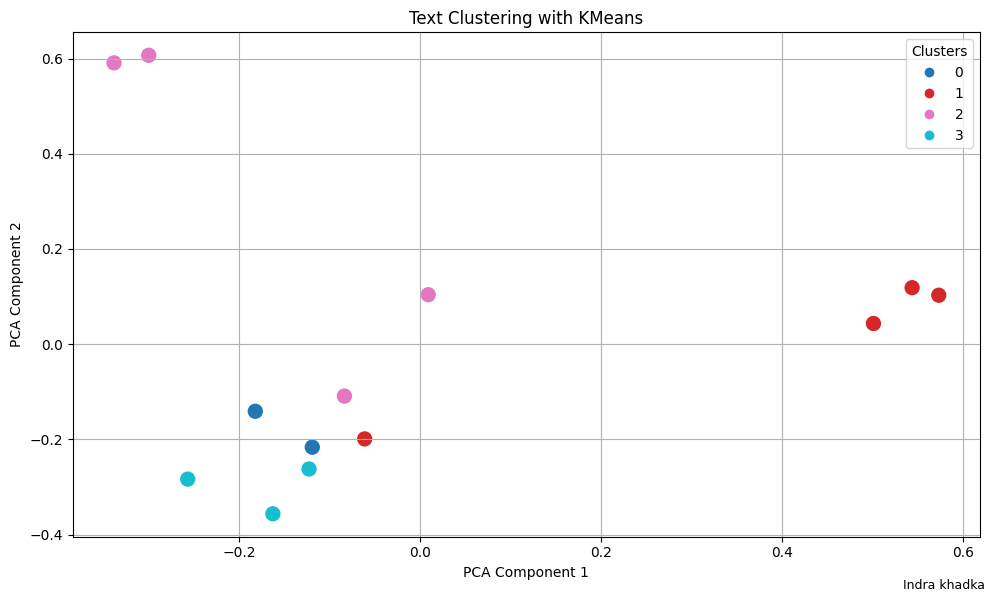

In [19]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Step 1: Load and preprocess the text
with open("/content/drive/MyDrive/data mining /question_3_data.txt", "r", encoding="utf-8") as f:
    raw_text = f.read()

# Step 2: Split text into documents (paragraphs)
documents = [para.strip() for para in raw_text.strip().split('\n') if para.strip()]

# Step 3: Convert to TF-IDF vectors
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(documents)

# Step 4: Apply KMeans Clustering
num_clusters = 4  # You can try different values like 3, 4, 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
labels = kmeans.fit_predict(X)

# Step 5: Print clustered documents
print("\nClustered Documents:\n" + "-"*30)
for i, doc in enumerate(documents):
    print(f"\n[Cluster {labels[i]}]:\n{doc}\n")

# Step 6: Visualize using PCA (2D projection)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='tab10', s=100)
plt.title("Text Clustering with KMeans")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.figtext(0.99, 0.01, "Indra khadka", ha="right", fontsize=9, color='black')
plt.grid(True)
plt.tight_layout()
plt.show()


Extracted categories:
1: Title of Database
10: References & Further Information
2: Data Type
3: Abstract
4: Sources
5: Data Characteristics
6: Other Relevant Information
7: Data Format
8: Past Usage
9: Acknowledgements, Copyright Information, and Availability


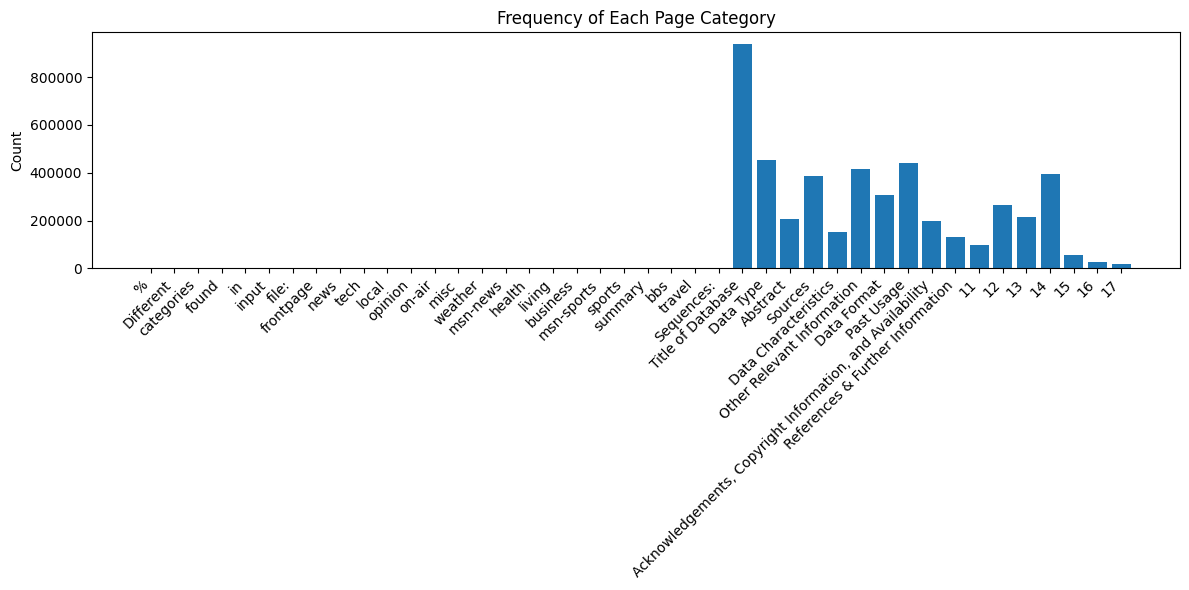

In [28]:
import re
from collections import Counter
import matplotlib.pyplot as plt
import gzip

# Parse description.txt to build category map
def extract_category_map(description_file):
    category_map = {}
    with open(description_file, 'r') as f:
        for line in f:
            match = re.match(r'^(\d+)\.\s+(.*\S)', line.strip())
            if match:
                cat_id = match.group(1)
                cat_name = match.group(2).strip()
                category_map[cat_id] = cat_name
    return category_map

category_map = extract_category_map('/content/drive/MyDrive/data mining /description.txt')

print("Extracted categories:")
for k, v in sorted(category_map.items()):
    print(f"{k}: {v}")

# Load session data from gzip file
with gzip.open('/content/drive/MyDrive/data mining /msnbc990928.seq.gz', 'rt') as f:
    sessions = [line.strip().split() for line in f if line.strip()]

# Flatten all page visits
all_pages = [page for session in sessions for page in session]

# Count frequency
freq = Counter(all_pages)

# Map IDs to category names
freq_named = {category_map.get(k, k): v for k, v in freq.items()}

# Plot bar chart
plt.figure(figsize=(12, 6))
plt.bar(freq_named.keys(), freq_named.values())
plt.xticks(rotation=45, ha='right')
plt.title("Frequency of Each Page Category")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


In [29]:
from collections import Counter

# Calculate transitions between consecutive pages in each session
transitions = []
for session in sessions:
    for i in range(len(session) - 1):
        transitions.append((session[i], session[i+1]))

# Count transitions
trans_freq = Counter(transitions)

# Map category IDs to names for readability
trans_freq_named = {
    (category_map.get(src, src), category_map.get(tgt, tgt)): count
    for (src, tgt), count in trans_freq.items()
}

# Print top 10 most common transitions
print("Top 10 page-to-page transitions:")
for (src, tgt), count in sorted(trans_freq_named.items(), key=lambda x: x[1], reverse=True)[:10]:
    print(f"{src} → {tgt}: {count}")


Top 10 page-to-page transitions:
Title of Database → Title of Database: 418764
Past Usage → Past Usage: 329235
14 → 14: 252592
Sources → Sources: 224891
Data Type → Data Type: 222340
Data Format → Data Format: 177517
Other Relevant Information → Other Relevant Information: 143982
12 → 12: 129836
13 → 13: 119008
Data Characteristics → Data Characteristics: 118987


In [30]:
import pandas as pd
import plotly.graph_objects as go

# Select top 30 transitions
top_30 = dict(sorted(trans_freq_named.items(), key=lambda x: x[1], reverse=True)[:30])

sources = [src for src, tgt in top_30.keys()]
targets = [tgt for src, tgt in top_30.keys()]
values = list(top_30.values())

# Create list of unique labels and mapping to indices
labels = list(set(sources + targets))
label_to_index = {label: i for i, label in enumerate(labels)}

# Build Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels,
        color="skyblue"
    ),
    link=dict(
        source=[label_to_index[s] for s in sources],
        target=[label_to_index[t] for t in targets],
        value=values
    )
)])

fig.update_layout(title_text="Top 30 Page-to-Page Transitions (Sankey Diagram)", font_size=12)
fig.show()
